<a href="https://colab.research.google.com/github/Natthapolmnc/SentimentAnalysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/Natthapolmnc/SentimentAnalysis/main/dat/train.tsv

--2021-01-29 06:45:16--  https://raw.githubusercontent.com/Natthapolmnc/SentimentAnalysis/main/dat/train.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8481022 (8.1M) [text/plain]
Saving to: ‘train.tsv’

train.tsv           100%[===================>]   8.09M  --.-KB/s    in 0.06s   

2021-01-29 06:45:16 (132 MB/s) - ‘train.tsv’ saved [8481022/8481022]



In [ ]:
!wget https://raw.githubusercontent.com/Natthapolmnc/SentimentAnalysis/main/dat/test.tsv

--2021-01-29 06:45:17--  https://raw.githubusercontent.com/Natthapolmnc/SentimentAnalysis/main/dat/test.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3367149 (3.2M) [text/plain]
Saving to: ‘test.tsv’

test.tsv            100%[===================>]   3.21M  --.-KB/s    in 0.05s   

2021-01-29 06:45:17 (64.0 MB/s) - ‘test.tsv’ saved [3367149/3367149]



In [ ]:
!wget https://raw.githubusercontent.com/Natthapolmnc/SentimentAnalysis/main/prep_dat/words_set.pkl

--2021-01-29 06:45:19--  https://raw.githubusercontent.com/Natthapolmnc/SentimentAnalysis/main/prep_dat/words_set.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 413815 (404K) [application/octet-stream]
Saving to: ‘words_set.pkl’

words_set.pkl       100%[===================>] 404.12K  --.-KB/s    in 0.01s   

2021-01-29 06:45:20 (38.2 MB/s) - ‘words_set.pkl’ saved [413815/413815]



In [ ]:
!wget https://raw.githubusercontent.com/Natthapolmnc/SentimentAnalysis/main/prep_dat/train.pkl

--2021-01-29 06:45:22--  https://raw.githubusercontent.com/Natthapolmnc/SentimentAnalysis/main/prep_dat/train.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14813918 (14M) [application/octet-stream]
Saving to: ‘train.pkl’

train.pkl           100%[===================>]  14.13M  --.-KB/s    in 0.1s    

2021-01-29 06:45:22 (130 MB/s) - ‘train.pkl’ saved [14813918/14813918]



In [ ]:
# !wget http://nlp.stanford.edu/data/glove.840B.300d.zip

--2021-01-28 13:58:03--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2021-01-28 13:58:04--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2021-01-28 13:58:04--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

In [ ]:
import pandas as pd
import pickle as pkl
from tqdm.notebook import tqdm
import tensorflow as tf
import numpy as np
import pickle as pkl
from sklearn.model_selection import KFold, StratifiedKFold

In [ ]:
import en_core_web_sm
from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups

In [ ]:
nlp = en_core_web_sm.load()

In [ ]:
def token_prep(token):
  # text lammatizing and lowercase
  return token.lower_

def token_filter(token):
  #check valid token not stop word of punctuation
  if (not token or not token.string.strip() or token.is_punct):
      return False
  return True

In [ ]:
def label_prep(dat):
    y=[]
    dat=dat.drop(columns=["SentenceId", "PhraseId"])
    dat=dat.where(dat["Phrase"].apply(lambda x:len(x.split())>10)).dropna()
    hits=0
    loss=0
    for i in tqdm(dat.values):
      one_hot=np.zeros((5,))
      one_hot[int(i[1])]=1
      y.append(one_hot)
    return y

In [ ]:
def extract_set_words(dat):
    x=[]
    dat=dat.drop(columns=["SentenceId", "PhraseId"])
    dat=dat.where(dat["Phrase"].apply(lambda x:len(x.split())>10)).dropna()
    for i in tqdm(dat.values):
       doc_i=nlp(i[0])
       wrds_set=[]
       for toks in doc_i:
          if (token_filter(toks)):
            wrds_set.append(token_prep(toks))
       x.append(wrds_set)
    
    all_words=[]
    for i in tqdm(x):
      for wrd in i:
        all_words.append(wrd)
    
    return list(set(all_words))


In [ ]:
def x_prep(dat):
    x=[]
    dat=dat.drop(columns=["SentenceId", "PhraseId"])
    dat=dat.where(dat["Phrase"].apply(lambda x:len(x.split())>10)).dropna()
    max_sent=0
    for i in tqdm(dat.values):
       doc_i=nlp(i[0])
       wrds_set=[]
       for toks in doc_i:
          if (token_filter(toks)):
            wrds_set.append(token_prep(toks))
       index_set=[]
       for wrd in wrds_set:
         index_set.append(index_word_dict[wrd])
       x.append(index_set)
       if (max_sent<(len(index_set))):
         max_sent=len(index_set)
    res=[]
    for i in tqdm(x):
      padded_res=np.zeros((max_sent,))
      padded_res[:len(i)]=i
      res.append(padded_res)
    
    return res
       

In [ ]:
train_dat=pd.read_csv("train.tsv",sep="\t")
test_dat=pd.read_csv("test.tsv",sep="\t")

In [ ]:
# Extract load set

# train_wrds=extract_set_words(train_dat)
# test_wrds=extract_set_words(test_dat)
# words_set=[]
# for i in tqdm(test_wrds):
#   words_set.append(i)
# for i in tqdm(train_wrds):
#   words_set.append(i)

## Load prep dat
words_set=None
with open("words_set.pkl","rb") as f:
  words_set=pkl.load(f)


In [ ]:
word_index_dict={1+k:v for k,v in enumerate(words_set)}
index_word_dict={v:k+1 for k,v in enumerate(words_set)}
# train_x=x_prep(train_dat)
# train_x=np.asarray(train_x)
# train_y=np.asarray(label_prep(train_dat))

## load prep dat
train=None
with open("train.pkl","rb") as f:
  train=pkl.load(f)
train_x,train_y=train

In [ ]:
f=open("train.pkl","wb")
pkl.dump([train_x,train_y],f)
f.close()

In [ ]:
f=open("words_set.pkl","wb")
pkl.dump(words_set,f)
f.close()

In [ ]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=300,trainable=False,weights=[embedding_matrix],mask_zero=True)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=300)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
# prepare pre-train embbeding
path_to_glove_file="/content/drive/Shareddrives/Chula Drive/Project/glove.840B.300d.txt"
 
embeddings_index = {}
with open(path_to_glove_file,"r",encoding="utf-8") as f:
    for line in tqdm(f):
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, dtype=float ,sep=" ")
        embeddings_index[word] = coefs
 
print("Found %s word vectors." % len(embeddings_index))
 
# create mapping of word vector
num_vocab=len(words_set)+1
emb_size=300
hits=0
misses=0
 
# Prepare embedding matrix
embedding_matrix = np.zeros((num_vocab, emb_size))
for i,word in tqdm(word_index_dict.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        try:
            embedding_matrix[i] = embedding_vector
            hits+=1
        except:
            misses+=1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
del embeddings_index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  



Found 2195884 word vectors.



Converted 23452 words (627 misses)


# **Semi-Transformer model**

In [ ]:
## Model #1 loss: 1.4037 - loss: 1.3829 - accuracy: 45.01% - val_loss: 1.4031 - val_accuracy: 45.69%

input_=tf.keras.layers.Input((48,))
add_pos=TokenAndPositionEmbedding(48,num_vocab)(input_)

### Attention
query=tf.keras.layers.Dense(128,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.005),activity_regularizer=tf.keras.regularizers.L2(0.01))(add_pos)
val=tf.keras.layers.Dense(128,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.005),activity_regularizer=tf.keras.regularizers.L2(0.01))(add_pos)
key=tf.keras.layers.Dense(128,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.005),activity_regularizer=tf.keras.regularizers.L2(0.01))(add_pos)
att_lay=tf.keras.layers.Attention()([query,val,key])
flat_lay=tf.keras.layers.Flatten()(att_lay)

### Result Dense
res=tf.keras.layers.Dense(5,activation="softmax")(flat_lay)

In [ ]:
## Model #2 loss: 1.4085 - accuracy: 44.54% - val_loss: 1.4184 - val_accuracy: 44.69%

input_=tf.keras.layers.Input((48,))
add_pos=TokenAndPositionEmbedding(48,num_vocab)(input_)

### Attention
query=tf.keras.layers.Dense(64,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.007),activity_regularizer=tf.keras.regularizers.L2(0.01))(add_pos)
val=tf.keras.layers.Dense(64,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.007),activity_regularizer=tf.keras.regularizers.L2(0.01))(add_pos)
key=tf.keras.layers.Dense(64,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.007),activity_regularizer=tf.keras.regularizers.L2(0.01))(add_pos)
att_lay=tf.keras.layers.Attention()([query,val,key])
flat_lay=tf.keras.layers.Flatten()(att_lay)

### Result Dense
res=tf.keras.layers.Dense(5,activation="softmax")(flat_lay)

In [ ]:
## Model #3 loss: 1.3243 - loss: 1.3670 - accuracy: 43.68% - val_loss: 1.3725 - val_accuracy: 45.11%

input_=tf.keras.layers.Input((48,))
add_pos=TokenAndPositionEmbedding(48,num_vocab)(input_)

### Attention
query=tf.keras.layers.Dense(32,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.007),activity_regularizer=tf.keras.regularizers.L2(0.01))(add_pos)
val=tf.keras.layers.Dense(32,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.007),activity_regularizer=tf.keras.regularizers.L2(0.01))(add_pos)
key=tf.keras.layers.Dense(32,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.007),activity_regularizer=tf.keras.regularizers.L2(0.01))(add_pos)
att_lay=tf.keras.layers.Attention()([query,val,key])
flat_lay=tf.keras.layers.Flatten()(att_lay)

### Result Dense
res=tf.keras.layers.Dense(5,activation="softmax")(flat_lay)

In [ ]:
## Model #4 loss: 1.3930 - accuracy: 42.19% - val_loss: 1.3943 - val_accuracy: 43.17%

input_=tf.keras.layers.Input((48,))
add_pos=TokenAndPositionEmbedding(48,num_vocab)(input_)

### Attention
query=tf.keras.layers.Dense(16,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.01),activity_regularizer=tf.keras.regularizers.L2(0.01))(add_pos)
val=tf.keras.layers.Dense(16,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.01),activity_regularizer=tf.keras.regularizers.L2(0.01))(add_pos)
key=tf.keras.layers.Dense(16,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.01),activity_regularizer=tf.keras.regularizers.L2(0.01))(add_pos)
att_lay=tf.keras.layers.Attention()([query,val,key])
flat_lay=tf.keras.layers.Flatten()(att_lay)

### Result Dense
res=tf.keras.layers.Dense(5,activation="softmax")(flat_lay)

In [ ]:
model=tf.keras.Model(inputs=input_ ,outputs=res)

In [ ]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 48)]         0                                            
__________________________________________________________________________________________________
token_and_position_embedding_2  (None, 48, 300)      7238400     input_8[0][0]                    
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 48, 16)       4816        token_and_position_embedding_2[0]
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 48, 16)       4816        token_and_position_embedding_2[0]
____________________________________________________________________________________________

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

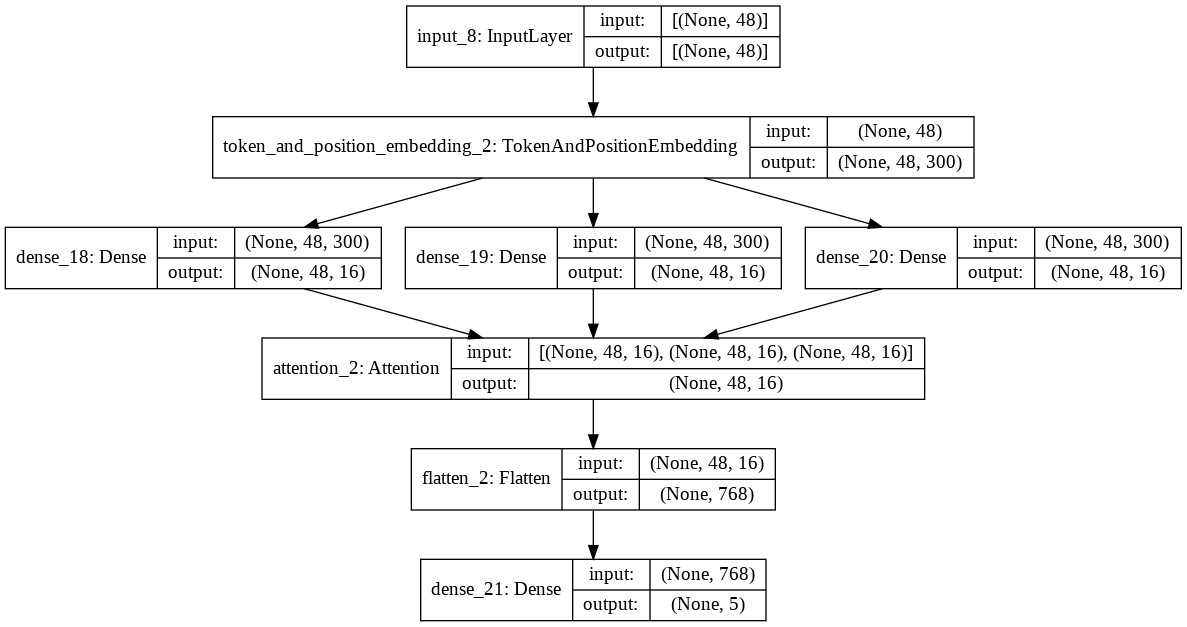

In [ ]:
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

In [ ]:
history=model.fit(x=train_x,y=train_y,batch_size=1024,epochs=50,validation_split=0.2)

Epoch 1/50
28/28 [==============================] - 2s 45ms/step - loss: 11.1321 - accuracy: 0.2700 - val_loss: 8.1157 - val_accuracy: 0.2896
Epoch 2/50
28/28 [==============================] - 1s 35ms/step - loss: 7.3390 - accuracy: 0.2921 - val_loss: 5.2433 - val_accuracy: 0.2974
Epoch 3/50
28/28 [==============================] - 1s 35ms/step - loss: 4.6973 - accuracy: 0.2807 - val_loss: 3.2536 - val_accuracy: 0.2912
Epoch 4/50
28/28 [==============================] - 1s 35ms/step - loss: 2.9161 - accuracy: 0.2835 - val_loss: 2.0767 - val_accuracy: 0.2871
Epoch 5/50
28/28 [==============================] - 1s 35ms/step - loss: 1.9304 - accuracy: 0.2778 - val_loss: 1.6435 - val_accuracy: 0.2885
Epoch 6/50
28/28 [==============================] - 1s 35ms/step - loss: 1.6292 - accuracy: 0.2760 - val_loss: 1.5750 - val_accuracy: 0.2895
Epoch 7/50
28/28 [==============================] - 1s 39ms/step - loss: 1.5746 - accuracy: 0.2830 - val_loss: 1.5581 - val_accuracy: 0.2898
Epoch 8/50
2

In [ ]:
plot=pd.DataFrame({'loss':history.history['loss'],'val_loss':history.history['val_loss']}).plot()
fig=plot.get_figure()
fig.savefig("train_loss_graph.pdf")

In [ ]:
plot=pd.DataFrame({'val_accuracy':history.history['val_accuracy'],'accuracy':history.history['accuracy']}).plot()
fig=plot.get_figure()
fig.savefig("train_loss_graph.pdf")

# **DeepAverage model**

In [ ]:
#Model 1 - loss: 1.5285 - accuracy: 0.2781 - val_loss: 1.5214 - val_accuracy: 0.2855

input_= tf.keras.layers.Input((48,))
emb_lay = tf.keras.layers.Embedding(input_dim=num_vocab, output_dim=300,trainable=False,weights=[embedding_matrix],mask_zero=True)(input_)
avg = tf.keras.layers.GlobalAveragePooling1D()(emb_lay)
den_i= tf.keras.layers.Dense(16,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.005))(avg)
res = tf.keras.layers.Dense(5,activation="softmax",kernel_regularizer=tf.keras.regularizers.L1(0.005))(den_i)

In [ ]:
#Model 2 - loss: 1.5260 - accuracy: 0.3166 - val_loss: 1.5195 - val_accuracy: 0.3074

input_= tf.keras.layers.Input((48,))
emb_lay = tf.keras.layers.Embedding(input_dim=num_vocab, output_dim=300,trainable=False,weights=[embedding_matrix],mask_zero=True)(input_)
avg = tf.keras.layers.GlobalAveragePooling1D()(emb_lay)
den_i= tf.keras.layers.Dense(32,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.001))(avg)
res = tf.keras.layers.Dense(5,activation="softmax",kernel_regularizer=tf.keras.regularizers.L1(0.001))(den_i)

In [ ]:
#Model 3 loss: 1.5374 - accuracy: 0.2749 - val_loss: 1.5300 - val_accuracy: 0.2861

input_= tf.keras.layers.Input((48,))
emb_lay = tf.keras.layers.Embedding(input_dim=num_vocab, output_dim=300,trainable=False,weights=[embedding_matrix],mask_zero=True)(input_)
avg = tf.keras.layers.GlobalAveragePooling1D()(emb_lay)
den_i= tf.keras.layers.Dense(64,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.005))(avg)
res = tf.keras.layers.Dense(5,activation="softmax",kernel_regularizer=tf.keras.regularizers.L1(0.005))(den_i)

In [ ]:
#Model 4 - loss: 1.5467 - accuracy: 0.2732 - val_loss: 1.5383 - val_accuracy: 0.2861

input_= tf.keras.layers.Input((48,))
emb_lay = tf.keras.layers.Embedding(input_dim=num_vocab, output_dim=300,trainable=False,weights=[embedding_matrix],mask_zero=True)(input_)
avg = tf.keras.layers.GlobalAveragePooling1D()(emb_lay)
den_i= tf.keras.layers.Dense(128,activation="relu",kernel_regularizer=tf.keras.regularizers.L1(0.005))(avg)
res = tf.keras.layers.Dense(5,activation="softmax",kernel_regularizer=tf.keras.regularizers.L1(0.005))(den_i)

In [ ]:
model1=tf.keras.Model(inputs=input_ ,outputs=res)

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 48)]              0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 48, 300)           7224000   
_________________________________________________________________
global_average_pooling1d_4 ( (None, 300)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               38528     
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 645       
Total params: 7,263,173
Trainable params: 39,173
Non-trainable params: 7,224,000
_________________________________________________________________


In [ ]:
model1.fit(x=train_x,y=train_y,batch_size=1024,epochs=50,validation_split=0.2)

Epoch 1/50
28/28 [==============================] - 1s 29ms/step - loss: 12.0447 - accuracy: 0.2394 - val_loss: 8.5031 - val_accuracy: 0.2939
Epoch 2/50
28/28 [==============================] - 1s 23ms/step - loss: 7.5612 - accuracy: 0.2990 - val_loss: 5.0130 - val_accuracy: 0.2935
Epoch 3/50
28/28 [==============================] - 1s 24ms/step - loss: 4.3774 - accuracy: 0.2925 - val_loss: 2.7746 - val_accuracy: 0.2624
Epoch 4/50
28/28 [==============================] - 1s 23ms/step - loss: 2.4524 - accuracy: 0.2819 - val_loss: 1.7963 - val_accuracy: 0.2861
Epoch 5/50
28/28 [==============================] - 1s 24ms/step - loss: 1.7567 - accuracy: 0.2756 - val_loss: 1.6596 - val_accuracy: 0.2861
Epoch 6/50
28/28 [==============================] - 1s 24ms/step - loss: 1.6535 - accuracy: 0.2749 - val_loss: 1.6148 - val_accuracy: 0.2861
Epoch 7/50
28/28 [==============================] - 1s 23ms/step - loss: 1.6135 - accuracy: 0.2747 - val_loss: 1.5923 - val_accuracy: 0.2861
Epoch 8/50
2

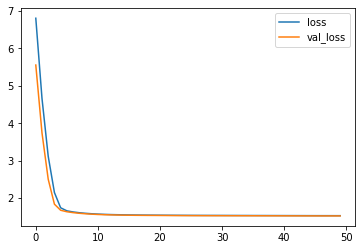

In [ ]:
plot=pd.DataFrame({'loss':history.history['loss'],'val_loss':history.history['val_loss']}).plot()
fig=plot.get_figure()
fig.savefig("train_loss_graph.pdf")

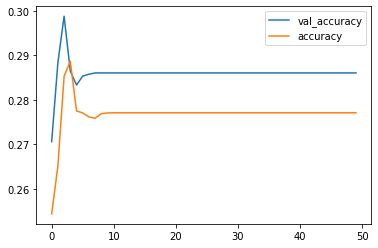

In [ ]:
plot=pd.DataFrame({'val_accuracy':history.history['val_accuracy'],'accuracy':history.history['accuracy']}).plot()
fig=plot.get_figure()
fig.savefig("train_loss_graph.pdf")

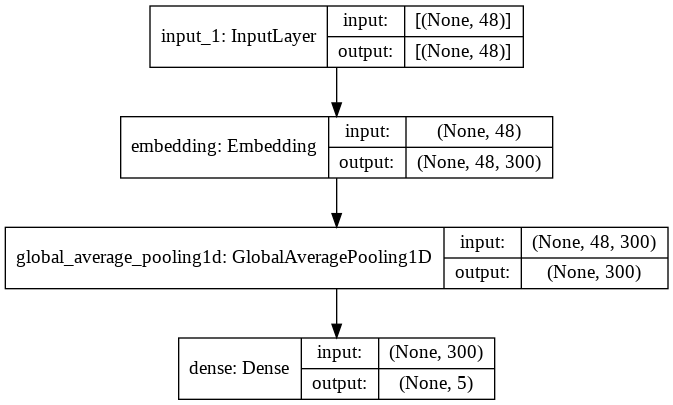

In [ ]:
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)